<h1>Iris Classification</h1>

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [227]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('iris.csv')
iris = pd.read_csv('iris.csv')

iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<h2>Univaraite Analysis</h2>

In [192]:
def abs_bar_labels():
    plt.ylabel('Absolute Frequency')
    plt.xticks(rotation = 0)
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
    for x in ax.patches:
        ax.annotate(x.get_height(), 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = 12, color = 'black')

def rel_bar_labels():
    plt.ylabel('Relative Frequency (%)')
    plt.xticks(rotation = 0)
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
    for x in ax1.patches:
        ax1.annotate(str(x.get_height()) + '%', 
        (x.get_x() + x.get_width()/2., x.get_height()), ha = 'center', va = 'center', xytext = (0, 7), 
        textcoords = 'offset points', fontsize = 12, color = 'black')
        
def item_count(var, lengths):
    global ax, ax1
    
    if lengths:
        cut_points = [0,1,2,3,4,5,6,7,8,9]
        var = pd.cut(var, cut_points)
    
    abs_freq = var.value_counts()
    rel_freq = round(var.value_counts(normalize = True)*100, 2)
    abs_rel = pd.DataFrame({'absolute': abs_freq, 'relative': rel_freq})    
        
    ax = abs_freq.plot.bar()
    plt.title('Absolute Frequency of %s' %var.name)
    abs_bar_labels()
    plt.show()
    
    ax1 = rel_freq.plot.bar()
    plt.title('Relative Frequency of %s' %var.name)
    rel_bar_labels()
    plt.show()
    
    display(abs_rel.sort_index(axis=0, ascending=True))

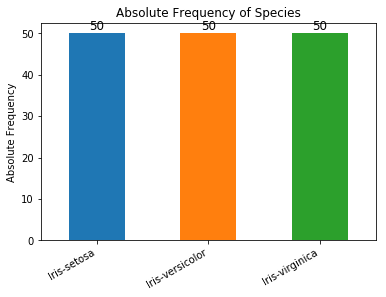

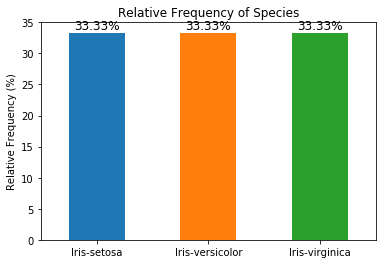

,absolute,relative
Iris-setosa,50,33.33
Iris-versicolor,50,33.33
Iris-virginica,50,33.33


In [193]:
item_count(iris.Species, False)

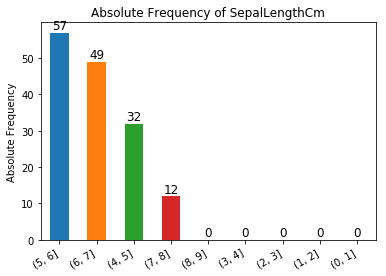

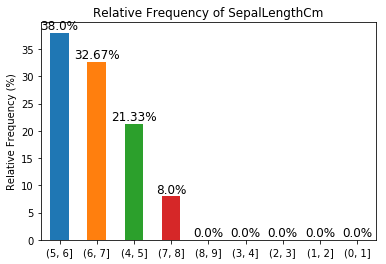

,absolute,relative
"(0, 1]",0,0.00
"(1, 2]",0,0.00
"(2, 3]",0,0.00
"(3, 4]",0,0.00
"(4, 5]",32,21.33
"(5, 6]",57,38.00
"(6, 7]",49,32.67
"(7, 8]",12,8.00
"(8, 9]",0,0.00


In [194]:
item_count(iris.SepalLengthCm, True)

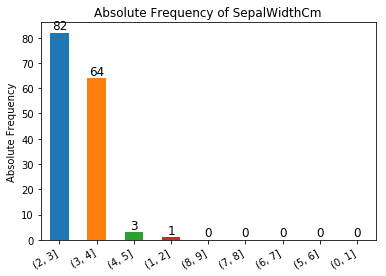

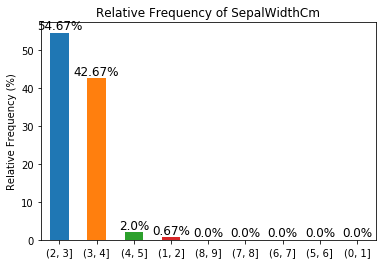

,absolute,relative
"(0, 1]",0,0.00
"(1, 2]",1,0.67
"(2, 3]",82,54.67
"(3, 4]",64,42.67
"(4, 5]",3,2.00
"(5, 6]",0,0.00
"(6, 7]",0,0.00
"(7, 8]",0,0.00
"(8, 9]",0,0.00


In [195]:
item_count(iris.SepalWidthCm, True)

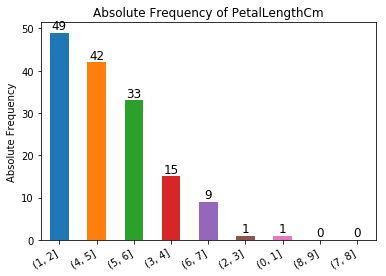

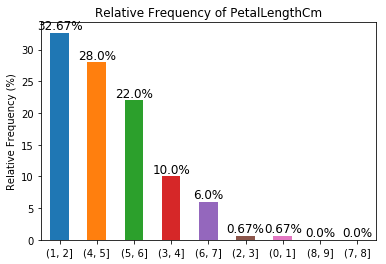

,absolute,relative
"(0, 1]",1,0.67
"(1, 2]",49,32.67
"(2, 3]",1,0.67
"(3, 4]",15,10.00
"(4, 5]",42,28.00
"(5, 6]",33,22.00
"(6, 7]",9,6.00
"(7, 8]",0,0.00
"(8, 9]",0,0.00


In [196]:
item_count(iris.PetalLengthCm, True)

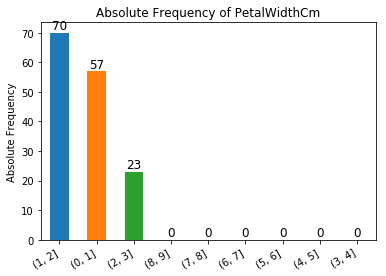

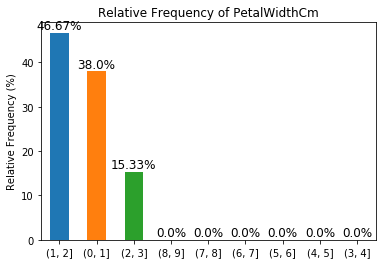

,absolute,relative
"(0, 1]",57,38.00
"(1, 2]",70,46.67
"(2, 3]",23,15.33
"(3, 4]",0,0.00
"(4, 5]",0,0.00
"(5, 6]",0,0.00
"(6, 7]",0,0.00
"(7, 8]",0,0.00
"(8, 9]",0,0.00


In [197]:
item_count(iris.PetalWidthCm, True)

In [198]:
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<h3>Findings</h3>
<br>
The dataset is complete, no missing values. Additionally, we see that the distribution of categories is more or less even, 43% in favour of Setosa and Vesicolor and 34% for virginica. All distribution of values for lengths are dispersed except for SepalWidthCm in which most values lie between (2,3] (53%) and (3,4] (43%) which could prove to be a problem as there is very low variance in those values. In other words, it might not be useful for classifying but further analysis is required before dropping it. 

<h2>View the data in a scatter plot to find patterns</h2>

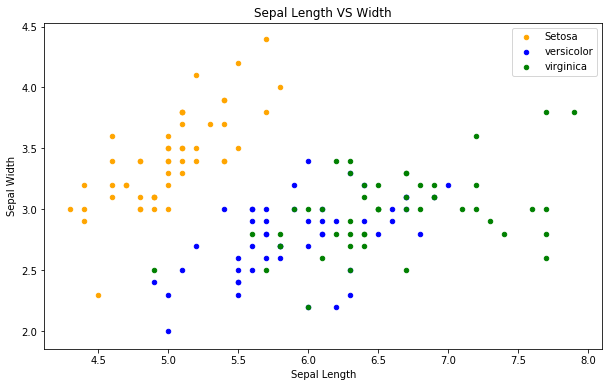

In [199]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

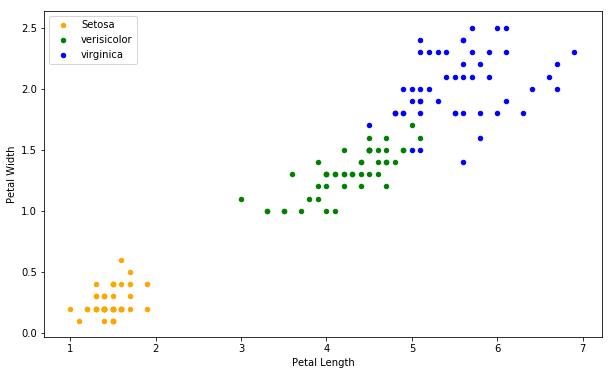

In [200]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', label='verisicolor', ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='blue', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

From the Scatter plots, we can see that petal length and widths have clear distinct groupings within the data as opposed to Sepal. As such, we can make a prediction that the petal features will be more reliable training features than Sepal data.

<h2>Bivariate Analysis</h2>

In [201]:
def boxplot(nume,cat):
    '''cat = categorical variable, and nume = numerical variable.'''
    ax = sns.boxplot(x = cat, y = nume)
    
    # Select boxes to change the color
    box = ax.artists[0]
    box1 = ax.artists[1]
    
    # Change the appearance of that box
    box.set_facecolor('red')
    box1.set_facecolor('green')
    
    plt.title('Association between Species & %s' %nume.name)
    plt.show()
    return display(ax)

def nume_grouped_by_cat(nume, cat):
    global ax
    grouped_by_cat = nume.groupby(cat).mean().sort_values( ascending = False)
    grouped_by_cat = round(grouped_by_cat, 2)
    ax = grouped_by_cat.plot.bar() 
    abs_bar_labels()
    plt.ylabel('Mean %s' %nume.name)
    plt.title('Species vs %s' %nume.name)
    print('Mean', nume.name, 'of Survivors vs Victims:')
    return display(grouped_by_cat)

def nume_hist_by_cat(nume,cat):
    nume[cat == 'Iris-virginica'].hist(color = ['g'], grid = False, label='Iris-virginica')
    nume[cat == 'Iris-versicolor'].hist(color = ['r'], grid = False, label='Iris-versicolor')
    nume[cat == 'Iris-setosa'].hist(color = ['b'], grid = False, label='Iris-setosa')
    plt.legend()
    plt.yticks([])
    plt.xlabel('%s' %nume.name)
    plt.title('Species vs %s' %nume.name)
    
def anova(nume, cat):
    group2 = nume[cat == 'Iris-setosa']
    group1 = nume[cat == 'Iris-virginica']
    group0 = nume[cat == 'Iris-versicolor']
    
    f_ratio, p_value = stats.f_oneway(group2, group1, group0)
    print("f ratio is: ", f_ratio, " and the p_value is: ", p_value)
    
def tukey(nume, group):
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    tukey = pairwise_tukeyhsd(endog = nume, 
                              groups = group,
                              alpha = 0.05)
    summary = tukey.summary()
    display(summary)

<h3>Species and SepalLengthCm</h3>

Mean SepalLengthCm of Survivors vs Victims:


Species
Iris-virginica     6.59
Iris-versicolor    5.94
Iris-setosa        5.01
Name: SepalLengthCm, dtype: float64

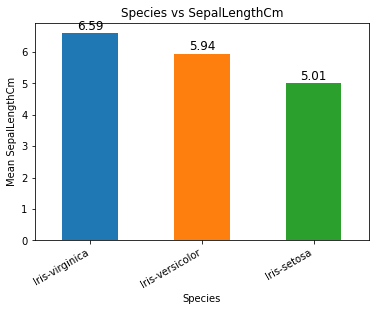

In [202]:
nume_grouped_by_cat(iris.SepalLengthCm, iris.Species)

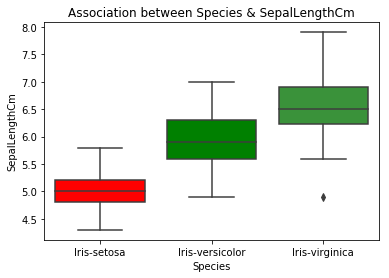

In [203]:
boxplot(iris.SepalLengthCm, iris.Species)

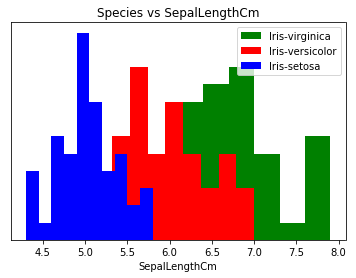

In [204]:
nume_hist_by_cat(iris.SepalLengthCm, iris.Species)

In [205]:
anova(iris.SepalLengthCm, iris.Species)

f ratio is:  119.26450218450468  and the p_value is:  1.6696691907693826e-31


In [206]:
tukey(iris.SepalLengthCm, iris.Species)

group1,group2,meandiff,lower,upper,reject
Iris-setosa,Iris-versicolor,0.93,0.6862,1.1738,True
Iris-setosa,Iris-virginica,1.582,1.3382,1.8258,True
Iris-versicolor,Iris-virginica,0.652,0.4082,0.8958,True


<h3>Findings</h3>
<br>
Looking at our plots and the anova/tukey results, we can see that each of the three species have statistically
significant differences in SpepalLength. This is a good indicator that this will be a strong classifier. 

<h3>Species and SepalWidthCm</h3>

Mean SepalWidthCm of Survivors vs Victims:


Species
Iris-setosa        3.42
Iris-virginica     2.97
Iris-versicolor    2.77
Name: SepalWidthCm, dtype: float64

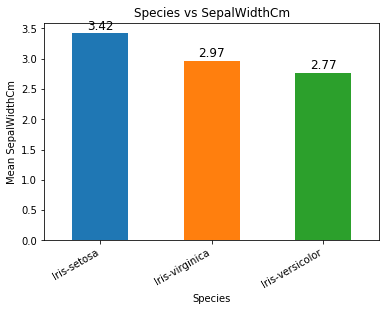

In [207]:
nume_grouped_by_cat(iris.SepalWidthCm, iris.Species)

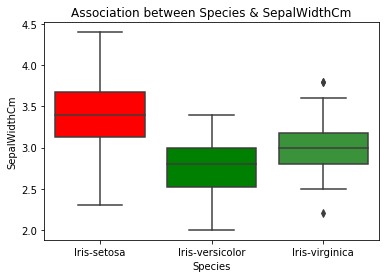

In [208]:
boxplot(iris.SepalWidthCm, iris.Species)

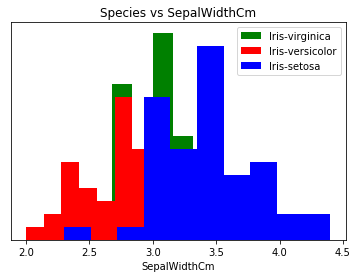

In [209]:
nume_hist_by_cat(iris.SepalWidthCm, iris.Species)

In [210]:
anova(iris.SepalWidthCm, iris.Species)

f ratio is:  47.36446140299383  and the p_value is:  1.3279165184572065e-16


In [211]:
tukey(iris.SepalWidthCm, iris.Species)

group1,group2,meandiff,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.648,-0.8092,-0.4868,True
Iris-setosa,Iris-virginica,-0.444,-0.6052,-0.2828,True
Iris-versicolor,Iris-virginica,0.204,0.0428,0.3652,True


<h3>Findings</h3>
<br>
Through the plots, we can see that virginica and versicolor have very similar SepalWidths which justifies what we noticed in our univariate analysis. The setosa specifies however has a tendency to have much larger widths.

<h3>Species and PetalLength</h3>

Mean PetalLengthCm of Survivors vs Victims:


Species
Iris-virginica     5.55
Iris-versicolor    4.26
Iris-setosa        1.46
Name: PetalLengthCm, dtype: float64

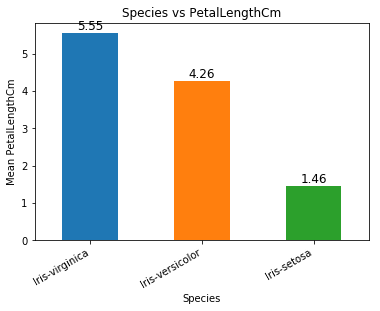

In [212]:
nume_grouped_by_cat(iris.PetalLengthCm, iris.Species)

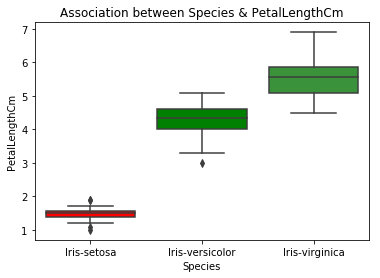

In [213]:
boxplot(iris.PetalLengthCm, iris.Species)

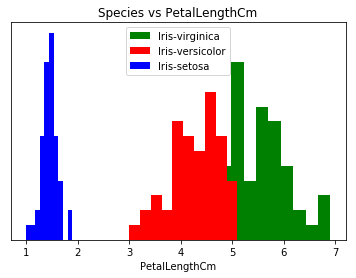

In [214]:
nume_hist_by_cat(iris.PetalLengthCm, iris.Species)

In [215]:
anova(iris.PetalLengthCm, iris.Species)

f ratio is:  1179.0343277002194  and the p_value is:  3.0519758018278374e-91


In [216]:
tukey(iris.PetalLengthCm, iris.Species)

group1,group2,meandiff,lower,upper,reject
Iris-setosa,Iris-versicolor,2.796,2.5922,2.9998,True
Iris-setosa,Iris-virginica,4.088,3.8842,4.2918,True
Iris-versicolor,Iris-virginica,1.292,1.0882,1.4958,True


<h3>Findings</h3>
<br>
There is clear seperation between setosa and the other two in terms of Petal length. Additionally there is very little overlap between virginica and versicolor and as such, this should be another strong feature for classification. 

<h3>Species and PetalWidthCm</h3>

Mean PetalWidthCm of Survivors vs Victims:


Species
Iris-virginica     2.03
Iris-versicolor    1.33
Iris-setosa        0.24
Name: PetalWidthCm, dtype: float64

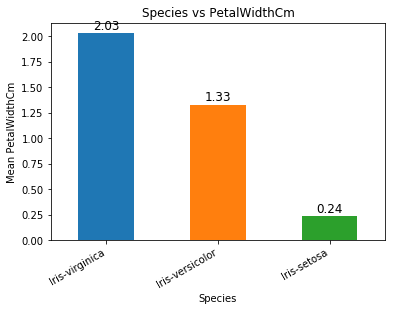

In [217]:
nume_grouped_by_cat(iris.PetalWidthCm, iris.Species)

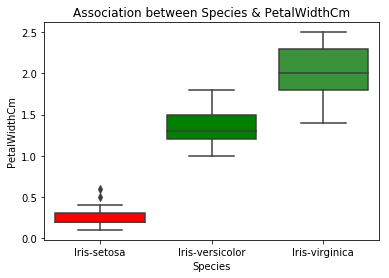

In [218]:
boxplot(iris.PetalWidthCm, iris.Species)

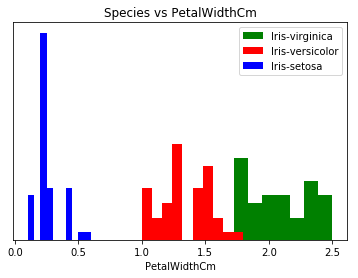

In [219]:
nume_hist_by_cat(iris.PetalWidthCm, iris.Species)

In [220]:
anova(iris.PetalWidthCm, iris.Species)

f ratio is:  959.3244057257591  and the p_value is:  4.376956957489586e-85


In [221]:
tukey(iris.PetalWidthCm, iris.Species)

group1,group2,meandiff,lower,upper,reject
Iris-setosa,Iris-versicolor,1.082,0.9849,1.1791,True
Iris-setosa,Iris-virginica,1.782,1.6849,1.8791,True
Iris-versicolor,Iris-virginica,0.7,0.6029,0.7971,True


<h3>Findings</h3>
<br>
Very similar findings to petallength, setosa is distinctly seperated and the other two have very few overlap. Another good indicator. 

<h2>Total Findings</h2>
<br>
Most of the features have statistical significance in finding species except for SepalWidth. We can either try to feature engineer it or just exclude for the time being. As seen in the boxplots, there are also a few datapoints that are outliers so we will remove them before continuing our analysis.
<br>

<h2>Removing Outliers</h2>

In [222]:
def outlier(var, col): 
    q1 = var[col].quantile(0.25)
    q3 = var[col].quantile(0.75)
    iqr = q3 - q1 
    
    u_fence = q3 + (iqr*1.5)
    l_fence = q1 - (iqr*1.5)
    
    outliers = var[(var[col] < l_fence) | (var[col] > u_fence)]
    
    filtered = var.drop(outliers.index, axis = 0)
    return filtered

In [223]:
species_split = [rows for Species, rows in iris.groupby('Species')]

setosa = pd.DataFrame(species_split[0])
versicolor = pd.DataFrame(species_split[1])
virginica = pd.DataFrame(species_split[2])

setosa = outlier(setosa, 'SepalLengthCm')
setosa = outlier(setosa, 'SepalWidthCm')
setosa = outlier(setosa, 'PetalWidthCm')
setosa = outlier(setosa, 'PetalLengthCm')

versicolor = outlier(versicolor, 'SepalLengthCm')
versicolor = outlier(versicolor, 'SepalWidthCm')
versicolor = outlier(versicolor, 'PetalWidthCm')
versicolor = outlier(versicolor, 'PetalLengthCm')

virginica = outlier(virginica, 'SepalLengthCm')
virginica = outlier(virginica, 'SepalWidthCm')
virginica = outlier(virginica, 'PetalWidthCm')
virginica = outlier(virginica, 'PetalLengthCm')

In [224]:
new_iris = pd.concat([setosa, versicolor, virginica], ignore_index=True)

from sklearn.utils import shuffle
iris = shuffle(new_iris)

iris.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
131,145,6.7,3.3,5.7,2.5,Iris-virginica
71,83,5.8,2.7,3.9,1.2,Iris-versicolor
68,80,5.7,2.6,3.5,1.0,Iris-versicolor


<h3>Outcome</h3>
<br>
We have now removed all rows that contained outlier values as this could skew some of our data. Our rows did fall from 120 to 103 however which is quite significant. I will recover the full 120 and do a comparison later on and see if removing outliers actually helped our model. 

<h2>Heatmap for correlation</h2>

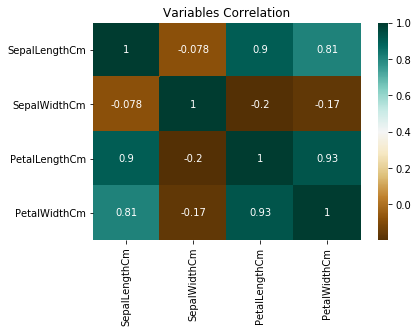

In [225]:
correlation = iris.loc[:, ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

from sklearn.preprocessing import LabelEncoder
correlation = correlation.agg(LabelEncoder().fit_transform)
correlation['SepalLengthCm'] = iris.SepalLengthCm 
correlation = correlation.set_index('SepalLengthCm').reset_index()

'''Now create the heatmap correlation.'''
sns.heatmap(correlation.corr(), cmap ='BrBG', annot = True)
plt.title('Variables Correlation')
plt.show()

<h3>Findings</h3>
<br>
The heatmap reinforces what we found when looking at the scatter plots that petal width and petal length have the strongest correlations with one other. We will take this into consideration when applying our models with training sets. 

<h2>Preparing our data</h2>

In [242]:
from sklearn.cross_validation import train_test_split

#full data 
train, test = train_test_split(data, test_size=0.2)

test = test.drop('Id', axis=1).copy()
test_x = test.drop(columns='Species', axis=1)
test_y = test['Species']

train = train.drop(columns='Id', axis=1)
train_x = train.drop(columns='Species', axis=1)
train_y = train['Species']


#removed outliers for training set
train1, test1 = train_test_split(iris, test_size=0.2)

train1 = train1.drop(columns='Id', axis=1)

train1_x = train1.drop(columns='Species', axis=1)
train1_y = train1['Species']

I've perpared two different training sets for our models, one will include all the data available and the other will be the set without the outlier values. I want to see if removing the outliers will have a stronger effect than losing a portion of the data. 

<h2>Time for Machine Learning</h2>

In [273]:
from sklearn import metrics #for checking the model accuracy

# how well it scores on training sets
def train_accuracy(model):
    model.fit(train_x, train_y)
    score = model.score(train_x, train_y)
    score = np.round(score*100, 2)
    return score  


def prediction_accuracy(model):
    model.fit(train_x, train_y)
    prediction = model.predict(test_x)
    return metrics.accuracy_score(prediction,test_y)
    
seed = 43

'''#1.Logistic Regression'''
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

'''#2.Support Vector Machines'''
from sklearn.svm import SVC
svc = SVC(gamma = 'auto')

'''#3.Random Forest Classifier'''
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = seed, n_estimators = 100)

'''#4.KNN'''
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

'''#5.Gaussian Naive Bayes'''
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

'''#6.Decision Tree Classifier'''
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = seed)

'''#7.Gradient Boosting Classifier'''
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state = seed)

'''#8.Adaboost Classifier'''
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state = seed)

In [267]:
prediction_accuracy(abc)

The accuracy is:  0.9666666666666667


In [270]:
models_accuracy = pd.DataFrame({'Train_accuracy(%)':[train_accuracy(lr), train_accuracy(svc),
                                                     train_accuracy(rf), train_accuracy(knn),
                                                     train_accuracy(gnb), train_accuracy(dt),
                                                     train_accuracy(gbc), train_accuracy(abc)]})
models_accuracy.index = ['LR', 'SVC', 'RF', 'KNN', 'GNB', 'DT', 'GBC', 'ABC']
sorted_train_accuracy = models_accuracy.sort_values(by = 'Train_accuracy(%)', ascending = False)

display(sorted_train_accuracy)

,Train_accuracy(%)
RF,100.00
DT,100.00
GBC,100.00
SVC,97.50
KNN,97.50
LR,96.67
GNB,95.83
ABC,92.50


In [274]:
models_prediction = pd.DataFrame({'Prediction_accuracy':[prediction_accuracy(lr), prediction_accuracy(svc),
                                                         prediction_accuracy(rf), prediction_accuracy(knn),
                                                         prediction_accuracy(gnb), prediction_accuracy(dt),
                                                         prediction_accuracy(gbc), prediction_accuracy(abc)]})
models_prediction.index = ['LR', 'SVC', 'RF', 'KNN', 'GNB', 'DT', 'GBC', 'ABC']
sorted_predictions = models_prediction.sort_values(by = 'Prediction_accuracy', ascending = False)

display(sorted_predictions)

,Prediction_accuracy
LR,1.000000
SVC,1.000000
RF,0.966667
KNN,0.966667
DT,0.966667
GBC,0.966667
ABC,0.966667
GNB,0.933333


First round of running, we see that our models are performing incredibly well on both training sets and test sets. We can tune hyperparameters but in this case, they seem well enough that I won't go too in depth for them. I will tune KNN as I have not done so before. 

([<matplotlib.axis.XTick at 0x1a17d764a8>,
 <a list of 10 Text xticklabel objects>)

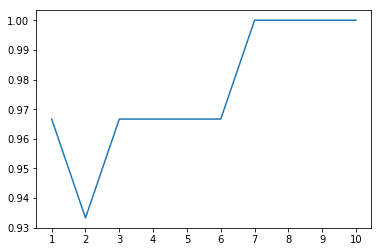

In [276]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_x,train_y)
    prediction=model.predict(test_x)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)

([<matplotlib.axis.XTick at 0x1a18228b00>,
 <a list of 10 Text xticklabel objects>)

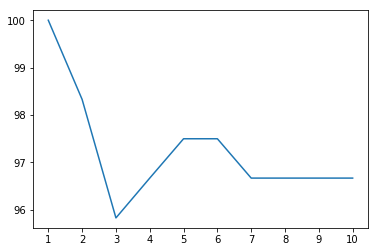

In [279]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_x,train_y)
    score = model.score(train_x, train_y)
    score = np.round(score*100, 2)
    
    a=a.append(pd.Series(score))
plt.plot(a_index, a)
plt.xticks(x)

Here we notice that for n >= 7, KNN predicts significantly better. As such, we will tune and retest KNN. 

In [282]:
knn = KNeighborsClassifier(7)

prediction_accuracy(knn)

1.0

In [283]:
train_accuracy(knn)

96.67

We notice that although we get a perfect prediction on our test set, our training accuracy drops. This shows that n >= 7 might not be the best parameter. 

In [287]:
def tune_hyperparameters(model, params):
    from sklearn.model_selection import GridSearchCV
    global best_params, best_score
    
    grid = GridSearchCV(model, params, cv = 10, scoring = 'accuracy', n_jobs = -1)
    grid.fit(train_x, train_y)
    best_params, best_score = grid.best_params_, np.round(grid.best_score_*100, 2)
    print('Best score:', best_score)
    print('Best parameters:', best_params) 
    return best_params, best_score

knn_params = {'n_neighbors':[3, 4, 5, 6, 7, 8, 9, 10],
              'leaf_size':[1, 2, 3, 5],
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree','kd_tree','brute']}

rf_params = {'criterion':['gini','entropy'],
             'n_estimators':[10, 15, 20, 25, 30],
             'min_samples_leaf':[1, 2, 3],
             'min_samples_split':[3, 4, 5, 6, 7], 
             'max_features':['sqrt', 'auto', 'log2'],
             'random_state':[44]}

knn = KNeighborsClassifier()

tune_hyperparameters(knn, params = knn_params)
knn_best_score, knn_best_params = best_score, best_params

Best score: 96.67
Best parameters: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 4, 'weights': 'uniform'}


Using gridsearch, we see that the best n_neighbor value is actually 4.

In [288]:
rf = RandomForestClassifier(random_state = seed, n_estimators = 100)

tune_hyperparameters(rf, params = rf_params)
rf_best_score, rf_best_params = best_score, best_params

Best score: 95.83
Best parameters: {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 15, 'random_state': 44}


<h3>Now I would like to experiement and see how well the dataset of removed outliers will perform</h3>

In [293]:
from sklearn import metrics #for checking the model accuracy

# how well it scores on training sets
def train1_accuracy(model):
    model.fit(train1_x, train1_y)
    score = model.score(train1_x, train1_y)
    score = np.round(score*100, 2)
    return score  


def prediction1_accuracy(model):
    model.fit(train1_x, train1_y)
    prediction = model.predict(test_x)
    return metrics.accuracy_score(prediction,test_y)
    
seed = 43

'''#1.Logistic Regression'''
lr = LogisticRegression()

'''#2.Support Vector Machines'''
svc = SVC(gamma = 'auto')

'''#3.Random Forest Classifier'''
rf = RandomForestClassifier(random_state = seed, n_estimators = 100)

'''#4.KNN'''
knn = KNeighborsClassifier()

'''#5.Gaussian Naive Bayes'''
gnb = GaussianNB()

'''#6.Decision Tree Classifier'''
dt = DecisionTreeClassifier(random_state = seed)

'''#7.Gradient Boosting Classifier'''
gbc = GradientBoostingClassifier(random_state = seed)

'''#8.Adaboost Classifier'''
abc = AdaBoostClassifier(random_state = seed)

In [291]:
models1_accuracy = pd.DataFrame({'Train_accuracy(%)':[train1_accuracy(lr), train1_accuracy(svc),
                                                     train1_accuracy(rf), train1_accuracy(knn),
                                                     train1_accuracy(gnb), train1_accuracy(dt),
                                                     train1_accuracy(gbc), train1_accuracy(abc)]})
models1_accuracy.index = ['LR', 'SVC', 'RF', 'KNN', 'GNB', 'DT', 'GBC', 'ABC']
sorted_train_accuracy1 = models1_accuracy.sort_values(by = 'Train_accuracy(%)', ascending = False)

display(sorted_train_accuracy1)

,Train_accuracy(%)
RF,100.00
DT,100.00
GBC,100.00
SVC,98.33
KNN,97.50
LR,95.83
GNB,95.00
ABC,95.00


Train_accuracy(%) for full dataset
RF	100.00
DT	100.00
GBC	100.00
SVC	97.50
KNN	97.50
LR	96.67
GNB	95.83
ABC	92.50

In comparison we see that the training values are slightly better with the outlier-free set. GNB and LR suffered a bit from the smaller dataset. 

In [295]:
models1_prediction = pd.DataFrame({'Prediction_accuracy':[prediction1_accuracy(lr), prediction1_accuracy(svc),
                                                         prediction1_accuracy(rf), prediction1_accuracy(knn),
                                                         prediction1_accuracy(gnb), prediction1_accuracy(dt),
                                                         prediction1_accuracy(gbc), prediction1_accuracy(abc)]})
models1_prediction.index = ['LR', 'SVC', 'RF', 'KNN', 'GNB', 'DT', 'GBC', 'ABC']
sorted_predictions1 = models1_prediction.sort_values(by = 'Prediction_accuracy', ascending = False)

display(sorted_predictions1)

,Prediction_accuracy
LR,1.000000
SVC,1.000000
KNN,1.000000
RF,0.966667
DT,0.966667
GBC,0.966667
ABC,0.966667
GNB,0.933333


Prediction_accuracy
LR	1.000000
SVC	1.000000
RF	0.966667
KNN	0.966667
DT	0.966667
GBC	0.966667
ABC	0.966667
GNB	0.933333

Surprising, the only model to be affected was KNN and it rose to a perfect prediction accuracy. The other models had no change whatsoever. 

<h3>Findings</h3>
<br>
Thus, for this dataset, it seems like having more precise values over larger quantity of data was slightly beneficial. I had assumed that there would be more difference since the outlier cutting removed almost 1/6 of total entries in our training sets. 

<h2>Feature Importance</h2>

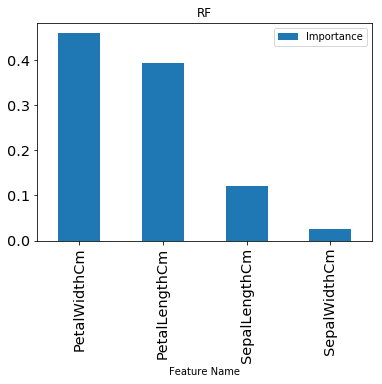

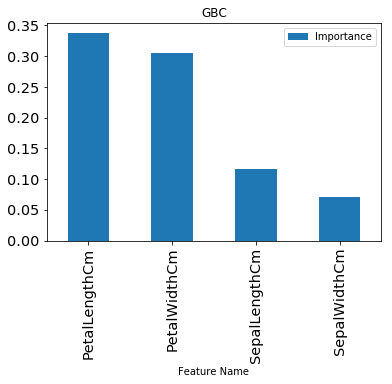

In [298]:
def plot_feature_importance(model):
    features = pd.DataFrame({'Feature Name': train_x.columns, 'Importance': np.round(model.feature_importances_, 3)})
    features = features.sort_values(by = 'Importance', ascending = False).set_index('Feature Name')
    return features

f_size = 14.5
plot_feature_importance(rf).plot.bar(title = 'RF', fontsize = f_size)
plot_feature_importance(gbc).plot.bar(title = 'GBC', fontsize = f_size)

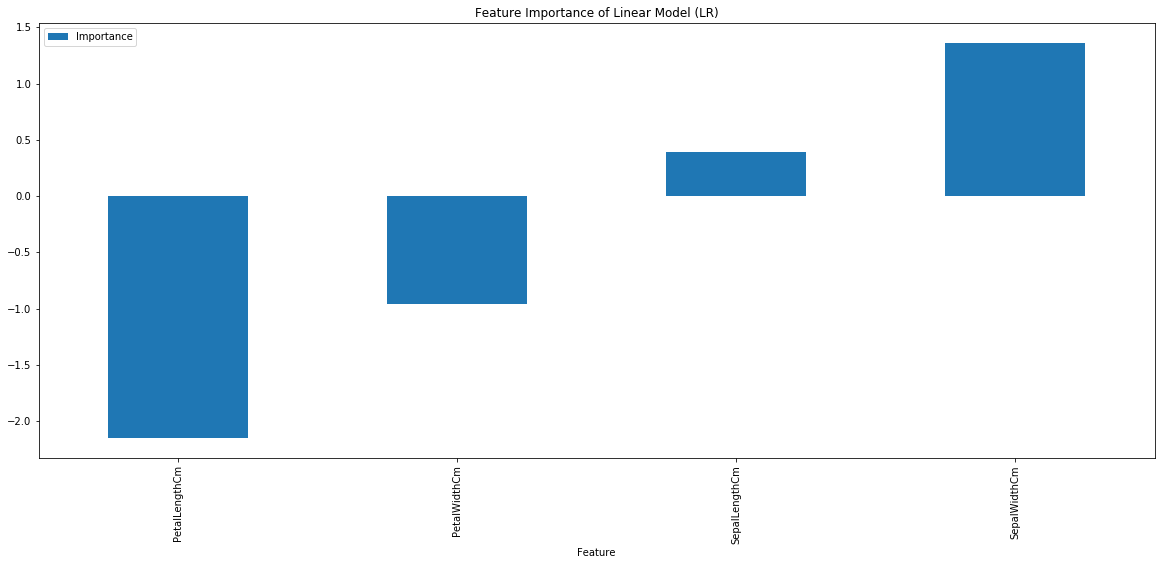

In [299]:
coeff = pd.DataFrame({"Feature":train_x.columns,"Importance":np.transpose(lr.coef_[0])})
coeff.sort_values(by = 'Importance').set_index('Feature').plot.bar(figsize = (20,8))
plt.title('Feature Importance of Linear Model (LR)')
plt.show()

As we expected, petal length and width were much larger factors than those coming from sepals. Another study found online conducted a test with just petal values vs sepal values and found an overwhelming difference in favour of petals. Thus, we can conclude that petals were the strongest distinguisher for our machine learning models.

<h1>Conclusion</h1>
<br>
The Iris dataset was very easy to work with but was good for practicing for classification. The best models to predict what species of irises are based on petal and sepal length and widths are tree models like DT or FR as well as Logistic regression and Support Vector Machines. They all performed very well. 